In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
import numpy as np
import math
import pandas as pd
pd.options.mode.chained_assignment = None

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
drug_df = pd.read_csv("drug200.csv")
drug_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
# drug type is the target feature
x = drug_df[["Age", "Sex", "BP", "Cholesterol", "Na_to_K"]]
y = drug_df[["Drug"]]

<h2> Preprocessing the data </h2>

In [4]:
x["Sex"] = x["Sex"].map({"F":0, "M":1})
x["BP"] = x["BP"].map({"LOW":0, "NORMAL":1, "HIGH":2})
x["Cholesterol"] = x["Cholesterol"].map({"LOW":0, "NORMAL":1, "HIGH":2})

In [5]:
x_np = x.to_numpy()
y_np = y.to_numpy()
x_scaled = preprocessing.scale(x_np)
print(x_scaled.shape)

(200, 5)


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_np, test_size=0.25, train_size=0.75, random_state=42)
y_train = y_train.reshape((y_train.shape[0]), 1)
print(x_train.shape)
print(y_train.shape)

(150, 5)
(150, 1)


<h1> 1 Hidden Layer </h1>

In [7]:
learning_rates=[0.001, 0.01, 0.1, 1, 10]
train_accuracies = []
test_accuracies = []
for alpha in learning_rates:
    clf = MLPClassifier(hidden_layer_sizes=1, random_state=1, max_iter=1000, learning_rate_init=alpha)
    clf.fit(x_train, y_train.ravel())
    predictions = clf.predict(x_test)
    train_accuracies.append(clf.score(x_train, y_train))
    test_accuracies.append(clf.score(x_test, y_test))
    print("Learning Rate:", alpha, "; Train Accuracy: ", clf.score(x_train, y_train), "; Test Accuracy: ", clf.score(x_test, y_test))
    print(confusion_matrix(y_test,predictions))
    print(classification_report(y_test,predictions))
    print("\n\n\n")

/Users/simransoin/src/IntroToML/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/simransoin/src/IntroToML/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Learning Rate: 0.001 ; Train Accuracy:  0.64 ; Test Accuracy:  0.64
[[18  0  0  0  2]
 [ 6  0  0  0  0]
 [ 3  0  0  0  0]
 [ 0  0  0  0  6]
 [ 1  0  0  0 14]]
              precision    recall  f1-score   support

       DrugY       0.64      0.90      0.75        20
       drugA       0.00      0.00      0.00         6
       drugB       0.00      0.00      0.00         3
       drugC       0.00      0.00      0.00         6
       drugX       0.64      0.93      0.76        15

    accuracy                           0.64        50
   macro avg       0.26      0.37      0.30        50
weighted avg       0.45      0.64      0.53        50





Learning Rate: 0.01 ; Train Accuracy:  0.7 ; Test Accuracy:  0.72
[[20  0  0  0  0]
 [ 2  0  0  0  4]
 [ 1  0  1  0  1]
 [ 0  0  0  0  6]
 [ 0  0  0  0 15]]
              precision    recall  f1-score   support

       DrugY       0.87      1.00      0.93        20
       drugA       0.00      0.00      0.00         6
       drugB       1.00     

/Users/simransoin/src/IntroToML/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/simransoin/src/IntroToML/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Learning Rate: 1 ; Train Accuracy:  0.6066666666666667 ; Test Accuracy:  0.5
[[19  0  1  0  0]
 [ 1  0  4  0  1]
 [ 0  0  2  0  1]
 [ 1  0  4  0  1]
 [ 0  0 11  0  4]]
              precision    recall  f1-score   support

       DrugY       0.90      0.95      0.93        20
       drugA       0.00      0.00      0.00         6
       drugB       0.09      0.67      0.16         3
       drugC       0.00      0.00      0.00         6
       drugX       0.57      0.27      0.36        15

    accuracy                           0.50        50
   macro avg       0.31      0.38      0.29        50
weighted avg       0.54      0.50      0.49        50





Learning Rate: 10 ; Train Accuracy:  0.26 ; Test Accuracy:  0.3
[[ 0  1  0  0 19]
 [ 0  0  0  0  6]
 [ 0  0  0  0  3]
 [ 0  0  0  0  6]
 [ 0  0  0  0 15]]
              precision    recall  f1-score   support

       DrugY       0.00      0.00      0.00        20
       drugA       0.00      0.00      0.00         6
       drugB       0.

/Users/simransoin/src/IntroToML/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/simransoin/src/IntroToML/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


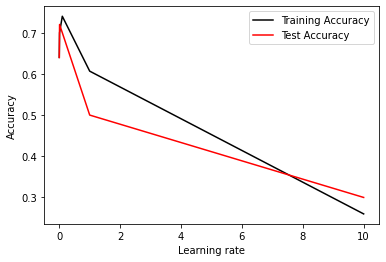

In [8]:
plt.plot(learning_rates, train_accuracies, c="black")
plt.plot(learning_rates, test_accuracies, c="red")
plt.xlabel("Learning rate")
plt.ylabel("Accuracy")
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

In [ ]:
<h1> 2 Hidden Layers </h1>

In [ ]:
learning_rates=[0.001, 0.01, 0.1, 1, 10]
train_accuracies = []
test_accuracies = []
for alpha in learning_rates:
    clf = MLPClassifier(hidden_layer_sizes=2, random_state=1, max_iter=1000, learning_rate_init=alpha)
    clf.fit(x_train, y_train.ravel())
    predictions = clf.predict(x_test)
    train_accuracies.append(clf.score(x_train, y_train))
    test_accuracies.append(clf.score(x_test, y_test))
    print("Learning Rate:", alpha, "; Train Accuracy: ", clf.score(x_train, y_train), "; Test Accuracy: ", clf.score(x_test, y_test))
    print(confusion_matrix(y_test,predictions))
    print(classification_report(y_test,predictions))
    print("\n\n\n")

In [ ]:
plt.plot(learning_rates, train_accuracies, c="black")
plt.plot(learning_rates, test_accuracies, c="red")
plt.xlabel("Learning rate")
plt.ylabel("Accuracy")
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')